# Face Mask Detector using CNN

## This project is about building a model which detects faces with mask and those without mask in real time using Caffe framework. 



In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


### The dataset which has been used to train the model consists of 3806 images with masks and 3828 images without masks.

In [2]:
dataset=r'C:\Users\KIIT\Desktop\Face Mask Detection\dataset'
imagePaths=list(paths.list_images(dataset))

In [3]:
imagePaths

['C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_10.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_100.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1000.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1001.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1002.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1003.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1004.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1005.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detection\\dataset\\without_mask\\without_mask_1006.jpg',
 'C:\\Users\\KIIT\\Desktop\\Face Mask Detectio

In [4]:
data=[]
labels=[]

In [5]:
for i in imagePaths:
    label=i.split(os.path.sep)[-2]
    labels.append(label)
    image=load_img(i,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    data.append(image)

C:\Users\KIIT\anaconda3\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [6]:
image

array([[[-0.6156863 , -0.73333335, -0.6784314 ],
        [-0.6156863 , -0.73333335, -0.6784314 ],
        [-0.6156863 , -0.73333335, -0.6784314 ],
        ...,
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       [[-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.64705884, -0.7647059 , -0.70980394],
        ...,
        [-0.4980392 , -0.67058825, -0.64705884],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       [[-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.6627451 , -0.78039217, -0.7254902 ],
        [-0.64705884, -0.7647059 , -0.70980394],
        ...,
        [-0.4980392 , -0.67058825, -0.64705884],
        [-0.5058824 , -0.6784314 , -0.654902  ],
        [-0.5058824 , -0.6784314 , -0.654902  ]],

       ...,

       [[ 0.4901961 ,  0.19215691,  0.01176476],
        [ 0

In [7]:
labels

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [8]:
data

[array([[[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],
 
        ...,
 
        [[-0.7176471 , -0.7176471 

In [9]:
data=np.array(data,dtype='float32')
labels=np.array(labels)

In [10]:
data

array([[[[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        [[ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         [ 0.94509804,  0.94509804,  0.94509804],
         ...,
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177],
         [ 0.92941177,  0.92941177,  0.92941177]],

        ...,

        [[-0.7176471 , -0.7176471 , -0

In [11]:
labels

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [12]:
lb=LabelBinarizer()
labels=lb.fit_transform(labelsss)
labels=to_categorical(labels)

In [13]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [14]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [15]:
train_X.shape

(6107, 224, 224, 3)

In [16]:
train_Y.shape

(6107, 2)

In [17]:
test_X.shape

(1527, 224, 224, 3)

In [18]:
test_Y.shape

(1527, 2)

In [19]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

### The model is being trained by fine-tuning the MobileNetV2 network.

In [20]:
baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

In [21]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [22]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [23]:
for layer in baseModel.layers:
    layer.trainable=False

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [25]:
learning_rate=0.001
Epochs=30
BS=16

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\KIIT\Documents\MachineLearning_scripts\Trained Models/maskdetect_mobilenet_v2_predictor.model')


Epoch 1/30
381/381 [==============================] - 387s 1s/step - loss: 0.2904 - accuracy: 0.8733 - val_loss: 0.0536 - val_accuracy: 0.9817
Epoch 2/30
381/381 [==============================] - 322s 845ms/step - loss: 0.1059 - accuracy: 0.9596
Epoch 3/30
381/381 [==============================] - 324s 850ms/step - loss: 0.0930 - accuracy: 0.9674
Epoch 4/30
381/381 [==============================] - 329s 864ms/step - loss: 0.0819 - accuracy: 0.9712
Epoch 5/30
381/381 [==============================] - 312s 818ms/step - loss: 0.0762 - accuracy: 0.9727
Epoch 6/30
381/381 [==============================] - 342s 898ms/step - loss: 0.0666 - accuracy: 0.9754
Epoch 7/30
381/381 [==============================] - 337s 884ms/step - loss: 0.0718 - accuracy: 0.9779
Epoch 8/30
381/381 [==============================] - 347s 910ms/step - loss: 0.0642 - accuracy: 0.9789
Epoch 9/30
381/381 [==============================] - 350s 918ms/step - loss: 0.0654 - accuracy: 0.9763
Epoch 10/30
381/381 [====

In [30]:
predictions=model.predict(test_X,batch_size=BS)
predictions=np.argmax(predictions,axis=1)
print(classification_report(test_Y.argmax(axis=1),predictions,target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       761
without_mask       1.00      0.99      0.99       766

    accuracy                           0.99      1527
   macro avg       0.99      0.99      0.99      1527
weighted avg       0.99      0.99      0.99      1527



### The model gives an accuracy of 0.99 and its been locally saved as:  maskdetect_mobilenet_v2_predictor.model

In [45]:
H.history

{'loss': [0.1822025328874588,
  0.10657935589551926,
  0.08760952949523926,
  0.08049733191728592,
  0.0774485170841217,
  0.07140505313873291,
  0.07141880691051483,
  0.06306322664022446,
  0.06617016345262527,
  0.06057730317115784,
  0.0532563291490078,
  0.061748206615448,
  0.05757942050695419,
  0.04974895343184471,
  0.04866977408528328,
  0.054902028292417526,
  0.05592048913240433,
  0.04876527562737465,
  0.04912830889225006,
  0.04294523224234581,
  0.04384927451610565,
  0.04739200696349144,
  0.04240717366337776,
  0.04854908213019371,
  0.04589131474494934,
  0.04173875227570534,
  0.04731160029768944,
  0.04227027669548988,
  0.04699070379137993,
  0.04785490408539772],
 'accuracy': [0.9320308566093445,
  0.9596125483512878,
  0.9688064455986023,
  0.972089946269989,
  0.9729108810424805,
  0.9734033942222595,
  0.9755376577377319,
  0.9773436188697815,
  0.9753735065460205,
  0.979149580001831,
  0.981119692325592,
  0.9781644940376282,
  0.9786570072174072,
  0.983253

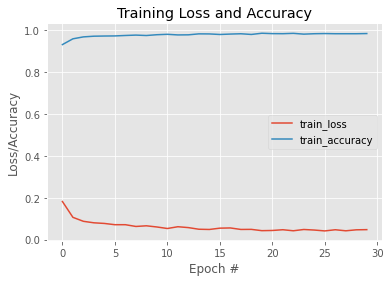

In [49]:
N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")

plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")
plt.savefig(r'C:\Users\KIIT\Desktop\Face Mask Detection\Graphs\plot_v2.png')